In [1]:
import pandas as pd
import numpy as np​import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fastai.text import *
import os
import seaborn as sns
import readability
import re


In [320]:
os.chdir("K:/VWTA/II/cap/set_amazon")

In [321]:
##read data file and check size
df = pd.read_pickle("set_amazon.pkl")
print(df.shape,df.columns)

(28332, 24) Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')


In [322]:
##drop duplicates
df = df.drop_duplicates(subset="reviews.text")
df.shape

(18168, 24)

In [323]:
##some overview of the data
len(df.id.unique())
##65 products -- id refers to products

64

64

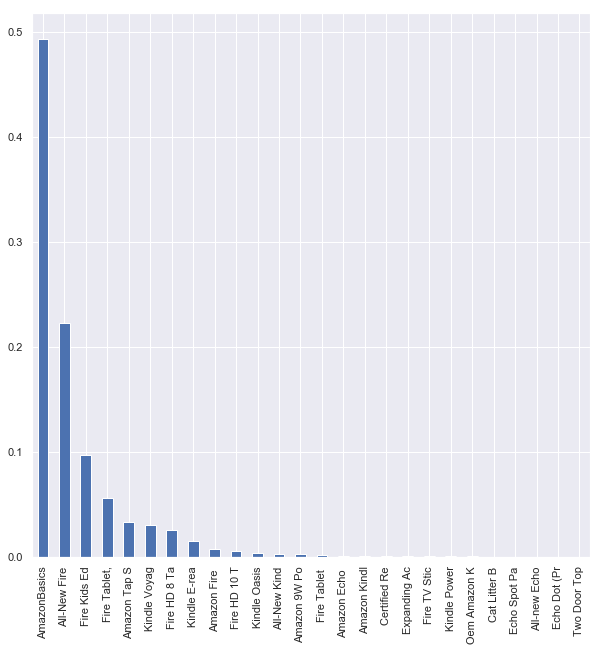

In [324]:
df.name.value_counts()
df.name.nunique()
##65 products; esentially the same info as df.id

df["name"] = df.name.apply(lambda x: x[:12])
##shorten the names for better plotting

df.name.value_counts(normalize=True).plot(kind="bar",figsize=(10,10))
df.name.unique()
##
df.asins.nunique()
## some kind of product flag 65--find out what


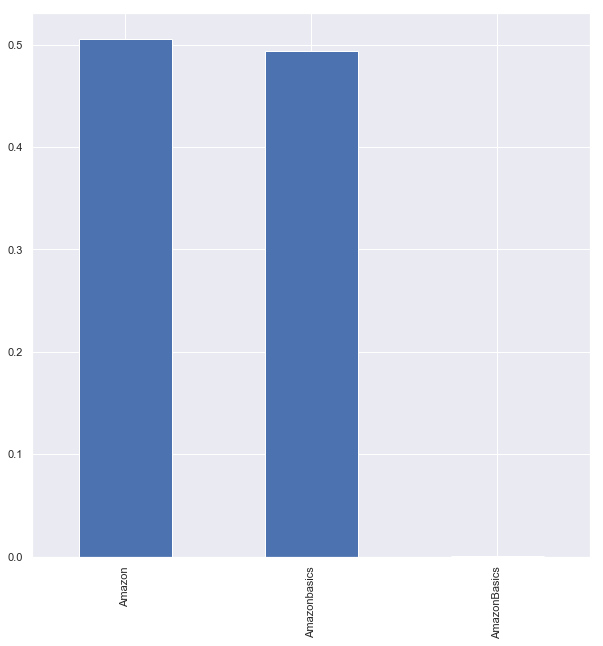

In [325]:
df.brand.unique()
## three Amazon product series .. 
df.brand.value_counts(normalize=True).plot(kind="bar",figsize=(10,10))

60


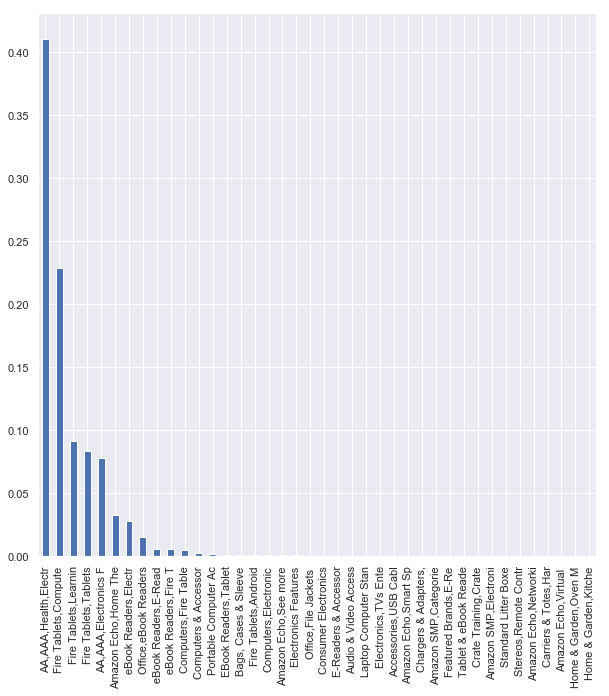

In [326]:
print(df.categories.nunique())
## 60 unique categories 

df["categories"] = df.categories.apply(lambda x: x[:20])
## shorten categories names for better visualization 

df.categories.value_counts(normalize=True).plot(kind="bar",figsize=(10,10))


9 64


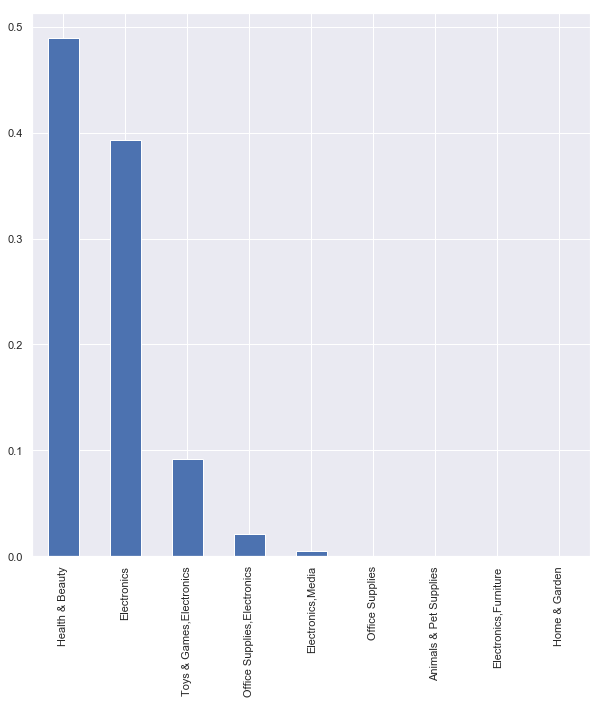

In [327]:
print(df.primaryCategories.nunique(),df.imageURLs.nunique())
df.primaryCategories.value_counts(normalize=True).plot(kind="bar",figsize=(10,10))


4


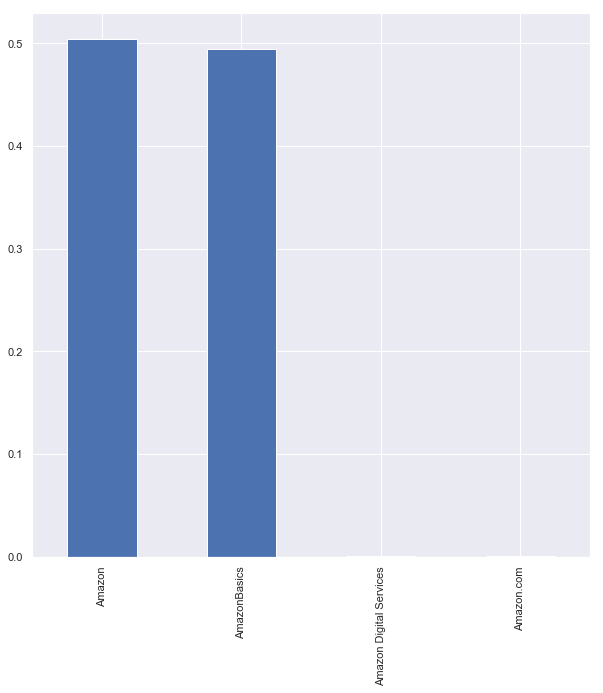

In [328]:
print(df.manufacturer.nunique())
df.manufacturer.value_counts(normalize=True).plot(kind="bar",figsize=(10,10))


In [329]:
ix = pd.DatetimeIndex(df["reviews.date"])
#max(ix)
ix.value_counts()

2017-01-23 00:00:00+00:00    276
2017-01-06 00:00:00+00:00    264
2017-01-18 00:00:00+00:00    222
2017-01-16 00:00:00+00:00    210
2016-12-23 00:00:00+00:00    195
                            ... 
2014-02-26 06:00:00+00:00      1
2014-11-21 00:00:00+00:00      1
2018-01-03 17:04:39+00:00      1
2019-03-10 00:00:00+00:00      1
2017-12-09 19:32:24+00:00      1
Name: reviews.date, Length: 1304, dtype: int64

In [330]:
df["reviews.date"] = ix

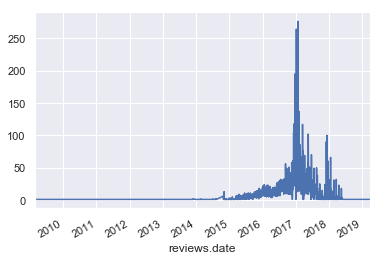

In [331]:
df.groupby(ix)["reviews.text"].apply(lambda x: x.shape[0]).plot()

9048


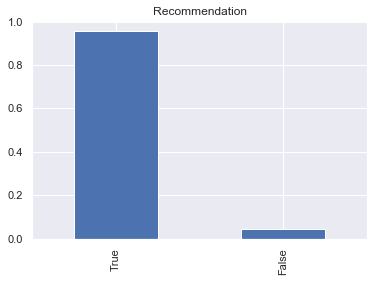

In [332]:
print(df["reviews.doRecommend"].isna().sum())
df["reviews.doRecommend"].value_counts(normalize=True).plot(kind="bar",title="Recommendation")

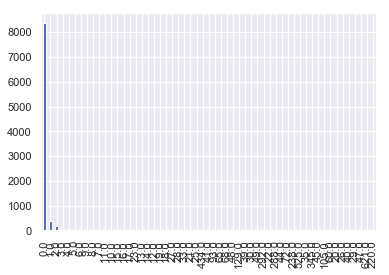

In [333]:
df["reviews.numHelpful"].isna().sum()
df["reviews.numHelpful"].value_counts().plot(kind="bar")

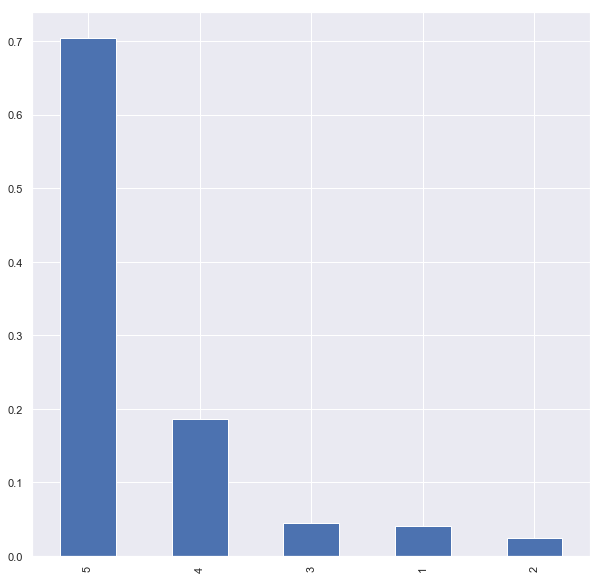

In [334]:
df["reviews.rating"].value_counts(normalize=True).plot(kind="bar",figsize=(10,10))

In [238]:
df["reviews.sourceURLs"].value_counts()

https://www.amazon.com/product-reviews/B00QWO9P0O/                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     8883
http://reviews.bestbuy.com/3545/4467600/reviews.htm?format=embedded&                                                                                                                                                                                                                                                                                                                                                                                                        

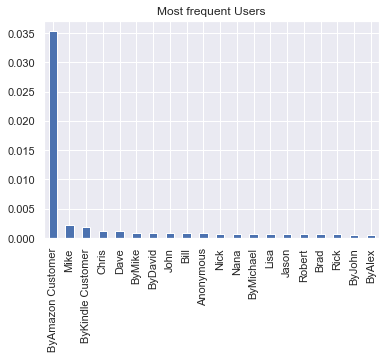

In [335]:
df["reviews.username"].nunique()
df["reviews.username"].value_counts(normalize=True)[:20].plot(kind="bar",title="Most frequent Users")

In [336]:
df["sourceURLs"].nunique()

64

In [337]:
### now add more variables helping to analyze dataset
## a check length of characters in titles and text
## b check number of words in titles and text 
df["title_character_len"] = df["reviews.title"].apply(lambda x: len("".join(x.split())))
df["text_character_len"] = df["reviews.text"].apply(lambda x: len("".join(x.split())))
df["title_word_len"] = df["reviews.title"].apply(lambda x : len(x.split()))
df["text_word_len"] = df["reviews.text"].apply(lambda x: len(x.split()))


In [338]:
### overall readability 
res = readability.getmeasures(df["reviews.text"],lang="en",merge=True)
##GunningFog - to complex for most - everything above 12 to hard
## others show school level between 8-11

## make plot here 

In [339]:
text_quality = pd.Series(res,index=res.keys())


In [340]:
#text_quality
df.text_word_len.describe()


count    18168.000000
mean        26.435821
std         35.141057
min          1.000000
25%         10.000000
50%         17.000000
75%         31.000000
max       1539.000000
Name: text_word_len, dtype: float64

In [351]:
readability.getmeasures(df["reviews.text"][5],merge=True)["sentences"]

1

In [352]:
res

OrderedDict([('Kincaid', 9.595982845824132),
             ('ARI', 11.53629869855235),
             ('Coleman-Liau', 7.4432999766416295),
             ('FleschReadingEase', 74.23602092983327),
             ('GunningFogIndex', 14.0688414324181),
             ('LIX', 41.410812678345245),
             ('SMOGIndex', 11.158862724125395),
             ('RIX', 3.8992184059885515),
             ('DaleChallIndex', 8.925882658726987),
             ('characters_per_word', 4.140007193480091),
             ('syll_per_word', 1.2442227363017337),
             ('words_per_sentence', 26.933729634522237),
             ('sentences_per_paragraph', 18168.0),
             ('type_token_ratio', 0.027962610252344013),
             ('characters', 2025838),
             ('syllables', 608838),
             ('words', 489332),
             ('wordtypes', 13683),
             ('sentences', 18168),
             ('paragraphs', 1),
             ('long_words', 70841),
             ('complex_words', 40313),
             ('

In [244]:
#ixx =np.where(df["text_character_len"]>10)[0]
## check ARI score and find number of sentences with this function 
def asign_score(x,name="ARI",length=15):
    if len(x.split())>length:
        outV = readability.getmeasures(x,merge=True,lang="en")
        return (outV[name], outV["sentences"])
    else:
        return (np.nan,np.nan)
 

ovecs = df["reviews.text"].apply(lambda x: asign_score(x))


In [245]:
df["ARI_Index"],df["text_sentence_len"] = list(zip(*ovecs))


In [353]:
## sentence counter does not work above 
from nltk.tokenize import TreebankWordTokenizer
import nltk
def number_of_sentences(x):
    
    tokenizer =TreebankWordTokenizer()
    os_sent = tokenizer.tokenize_sents(x)
    n_sen = len([ i for i in os_sent if ('.' in i) or ('?' in i) or ('!' in i)])   
    n_sub_sen = len([ i for k in os_sent for i in k if (',' in i) and (len(i)==1)])
    return(n_sen,n_sub_sen)
    

In [355]:
all_text_sentences = df["reviews.text"].apply(lambda x: number_of_sentences(x))

In [359]:
df["text_sentence_len"],df["text_subsentences"] = list(zip(*all_text_sentences))

In [361]:
df.shape
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs',
       'title_character_len', 'text_character_len', 'title_word_len',
       'text_word_len', 'text_sentence_len', 'text_subsentences'],
      dtype='object')

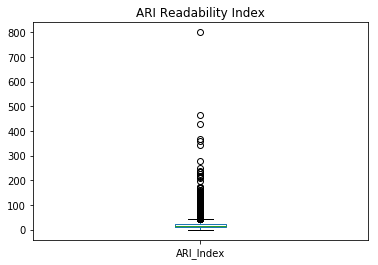

In [246]:
df["ARI_Index"].plot(kind="box",title="ARI Readability Index")
### outliers are due to short text or lackage of sentence structure 

In [362]:
## generatre sentiment scores
sia = SentimentIntensityAnalyzer()


sia_scores = pd.DataFrame([sia.polarity_scores(x) for x in df["reviews.text"] ])
sia_scores.index = df.index
df = pd.concat([df,sia_scores],axis=1,ignore_index=False)




In [363]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs',
       'title_character_len', 'text_character_len', 'title_word_len',
       'text_word_len', 'text_sentence_len', 'text_subsentences', 'neg', 'neu',
       'pos', 'compound'],
      dtype='object')

In [364]:
df.shape

(18168, 34)

reviews.rating
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
Name: compound, dtype: object

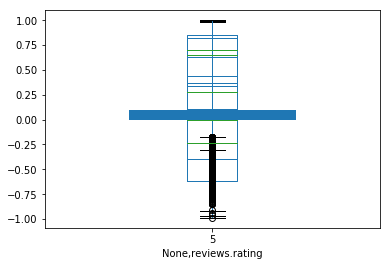

In [257]:
### make plots
df.groupby("reviews.rating")["neg","neu","pos","compound"].mean().unstack().plot(kind="bar",stacked="True")
df.groupby("reviews.rating")["compound"].plot(kind="box")
##sns.boxplot(x="reviews.rating",y="compound",data=df )

In [123]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs',
       'title_character_len', 'text_character_len', 'title_word_len',
       'text_word_len', 'ARI Index', 'ARI_Index', 'text_sentence_len', 'neg',
       'neu', 'pos', 'compound'],
      dtype='object')

In [109]:
##questions to investigate:
## are there key differences between ratings - with respect to products/groups, text_lenght,number of sentences,emotion
## do.Recommend etc
## helpful reviews - differences to text quality and ratings? 
## are there key reviewers? which ratings do they give on which products 

(18168,)

In [267]:
df.columns



Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs',
       'title_character_len', 'text_character_len', 'title_word_len',
       'text_word_len', 'ARI_Index', 'text_sentence_len', 'neg', 'neu', 'pos',
       'compound'],
      dtype='object')

In [259]:
a = df.loc[:,["reviews.rating","title_character_len","text_character_len",
                 "text_character_len","text_character_len","title_word_len","text_word_len","neg","neu","pos","compound",
                 "ARI_Index"]]
                 

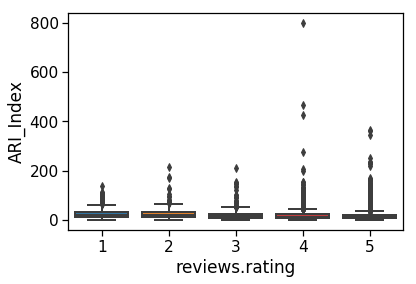

In [298]:
sns.set_context("notebook",font_scale=1.4,rc={"lines.linewidth":2,"axes.grid":True,
                                              "font.sans-serif":"Bitstream Vera Sans",
                                             "ytick.right":False})

ax = sns.boxplot(x="reviews.rating",y="ARI_Index",data=df)
ax.set_suptitle=("relation")

#sns.despine(left=True)

In [118]:
df.isna().sum()

id                         0
dateAdded                  0
dateUpdated                0
name                       0
asins                      0
brand                      0
categories                 0
primaryCategories          0
imageURLs                  0
keys                       0
manufacturer               0
manufacturerNumber         0
reviews.date               0
reviews.dateSeen           0
reviews.didPurchase    18159
reviews.doRecommend     9048
reviews.id             18127
reviews.numHelpful      9019
reviews.rating             0
reviews.sourceURLs         0
reviews.text               0
reviews.title              0
reviews.username           0
sourceURLs                 0
title_character_len        0
text_character_len         0
title_word_len             0
text_word_len              0
ARI Index               8354
ARI_Index               8354
text_sentence_len       8354
dtype: int64

In [119]:
df.shape


(18168, 31)

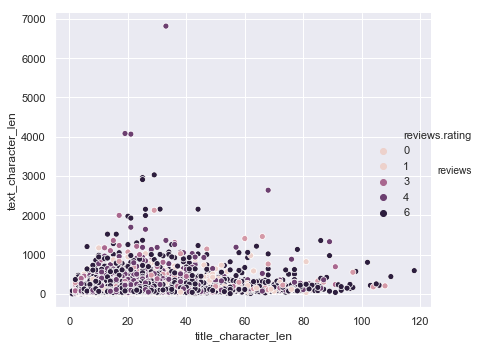

In [307]:
g = sns.relplot(x="title_character_len",y="text_character_len",hue="reviews.rating",data=df)
g.add_legend(title="reviews")

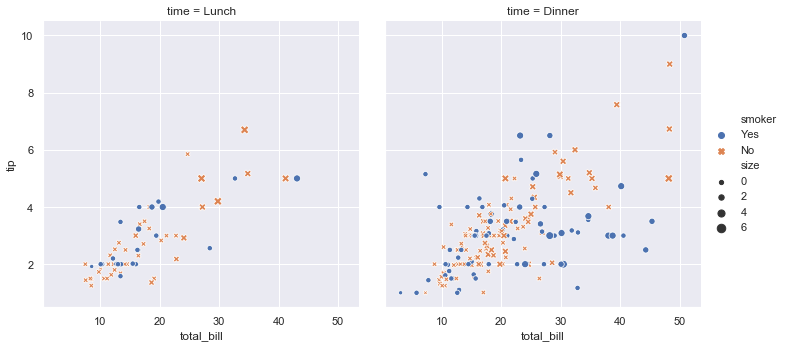

In [303]:
import seaborn as sns
sns.set()
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

In [309]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs',
       'title_character_len', 'text_character_len', 'title_word_len',
       'text_word_len', 'ARI_Index', 'text_sentence_len', 'neg', 'neu', 'pos',
       'compound'],
      dtype='object')

In [319]:
df["text_sentence_len"]

0        1.0
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
28293    1.0
28297    NaN
28303    NaN
28311    1.0
28325    1.0
Name: text_sentence_len, Length: 18168, dtype: float64

In [365]:
df.to_pickle("df_1.pkl")